# Task 5-To explore Business Analytics


Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.

What all business problems you can derive by looking into the data?

Dataset:

https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

Author: Shalin Sharma

Email: shalinsharma1807@gmail.com

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [6]:
data=pd.read_csv('SampleSuperstore.csv')

Overview Of Dataset

In [7]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Checking for Null/NaN entries

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Basic Information Of The Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Describing Data

In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Correlation 


In [11]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Deleting the Variable.


In [12]:
col=['Postal Code']
sample1=data.drop(columns=col,axis=1)
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## Data Visualization

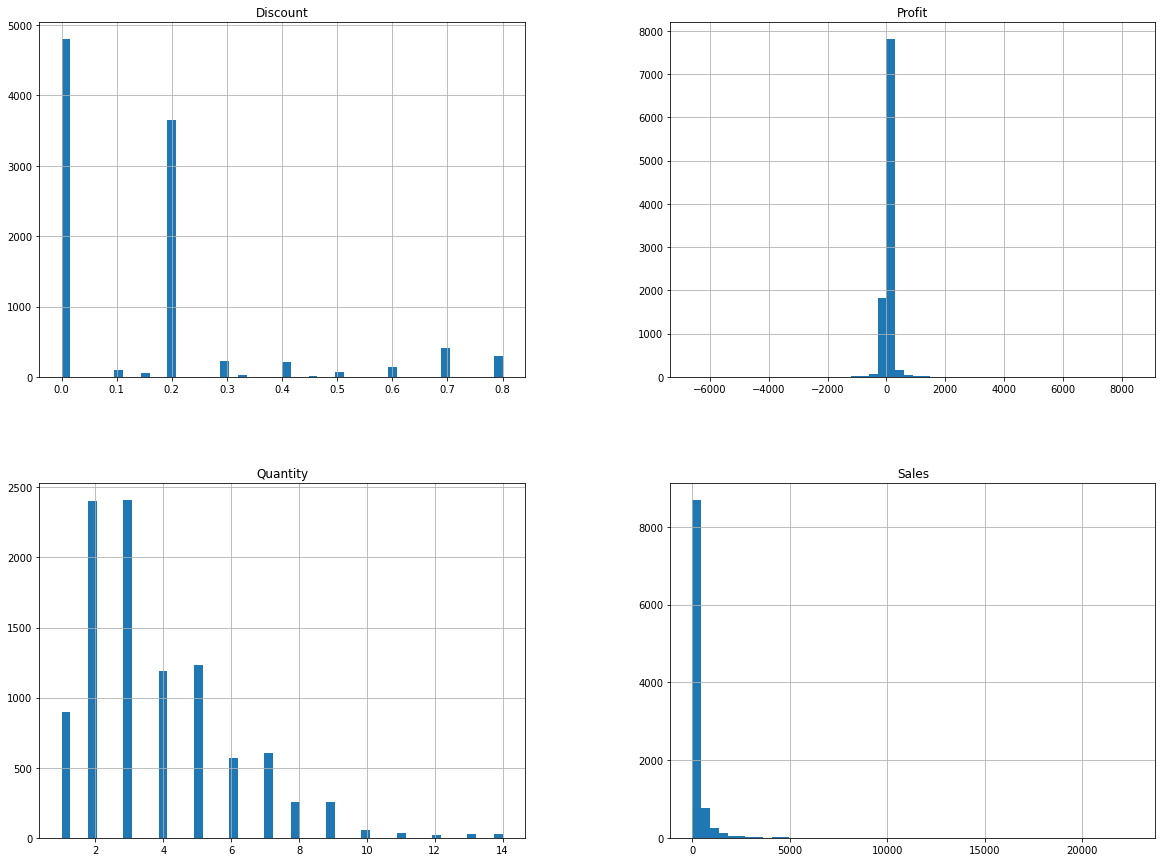

In [13]:
sample1.hist(bins=50 ,figsize=(20,15))
plt.show();

From the histogram Graph we can say that our data is not normal.

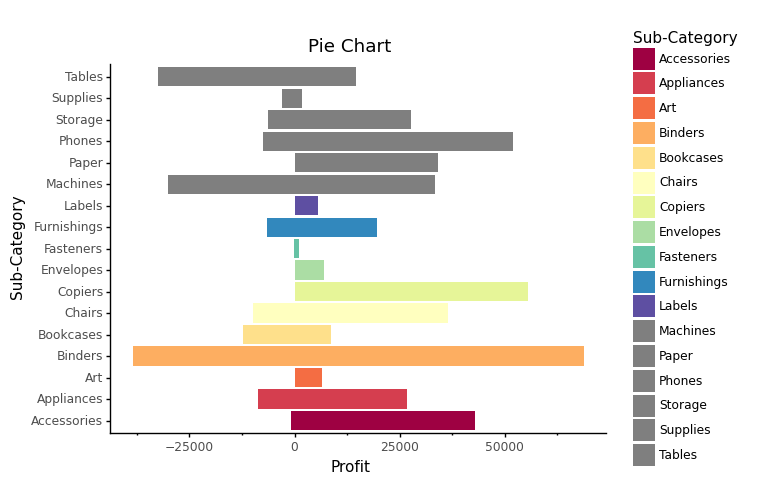

<ggplot: (8752610697136)>

In [15]:
Profit_plot = (ggplot(data, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Above Pie chart Shows the profit and loss of each and every subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory).

Next,"Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

Next,Suffering from highest loss is machines.

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

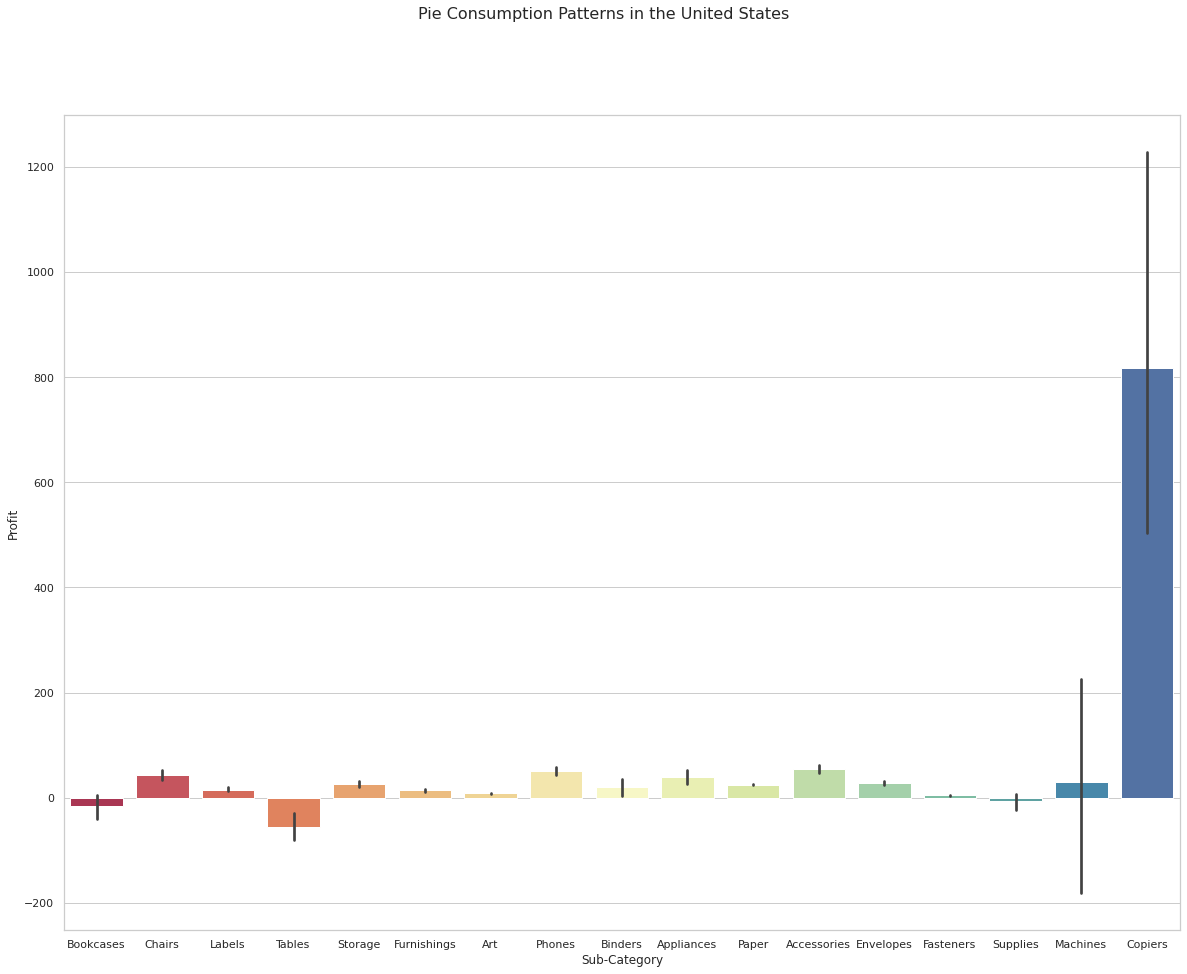

In [17]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sns.barplot(x='Sub-Category',y='Profit', data=data, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

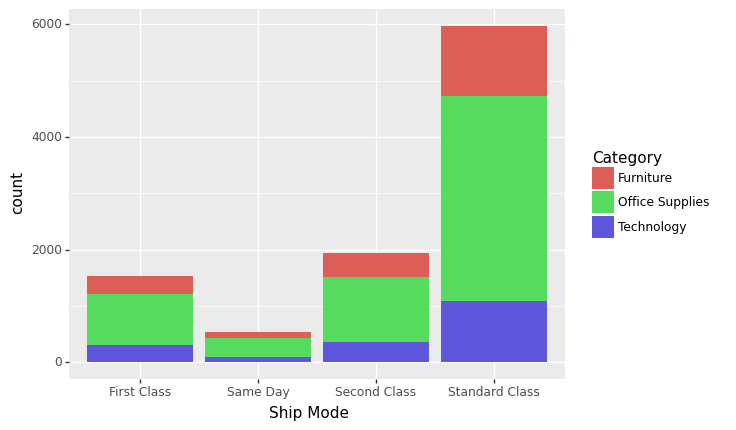

<ggplot: (8752610712710)>

In [19]:
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

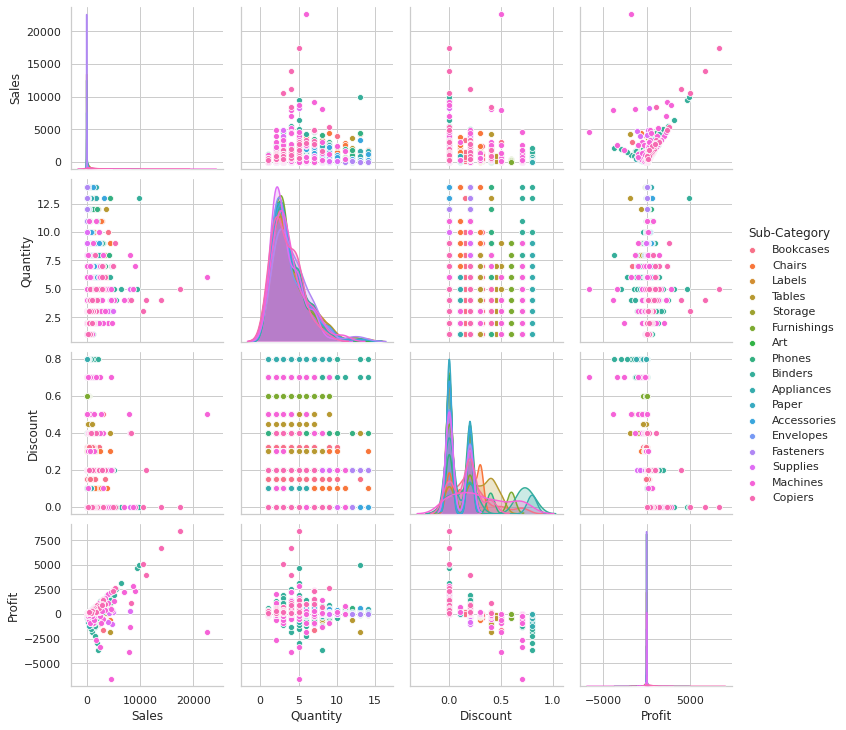

In [20]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')

From the above plot we can say that Our Data is not Normal and it has some amount of outliers too.

Let's explore more about these outliers by using boxplots.

Ist we'll check Sales from Every Segments of Whole Data

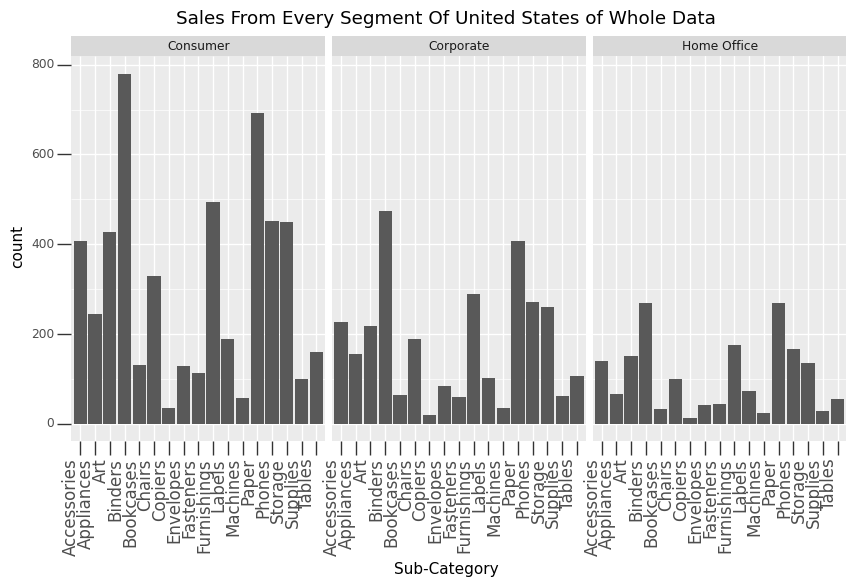

<ggplot: (-9223363284244078711)>

In [21]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

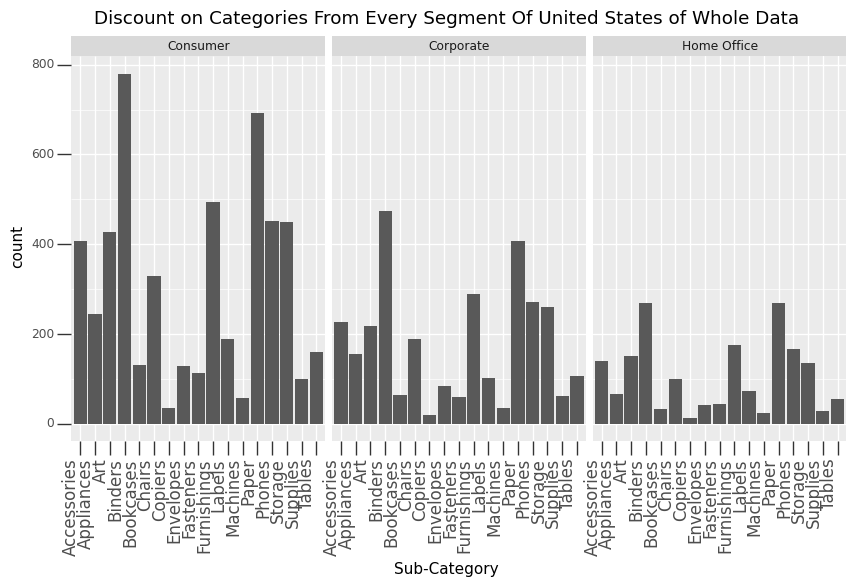

<ggplot: (8752611059397)>

In [22]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

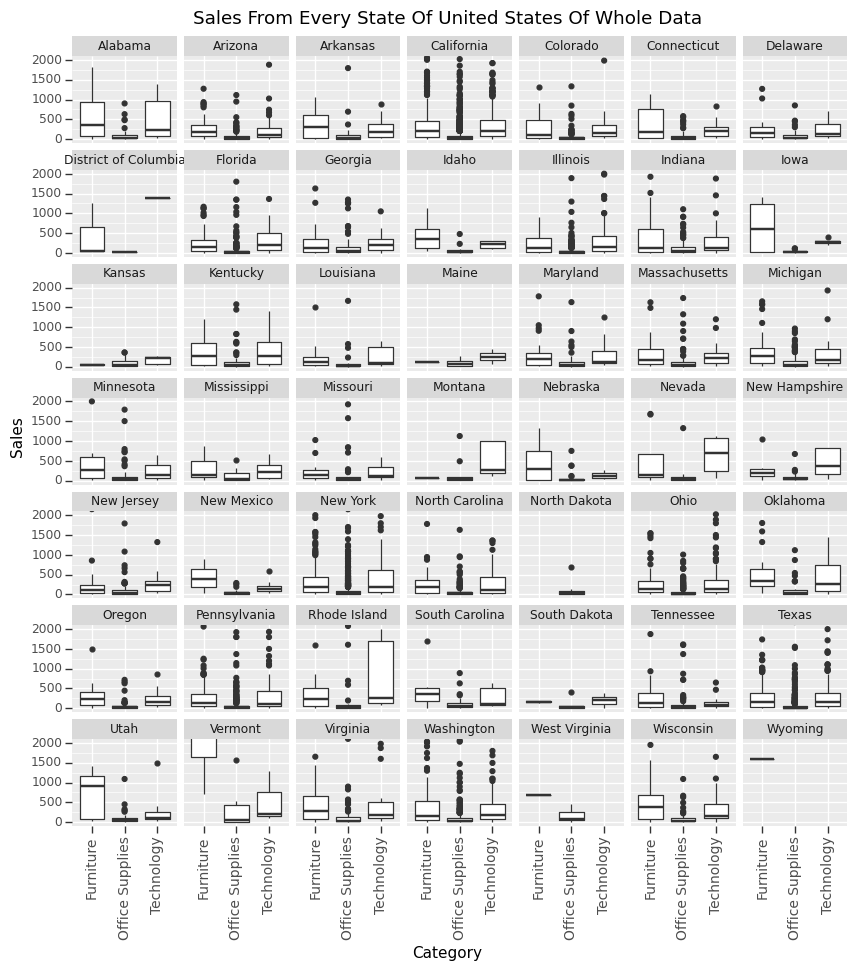

<ggplot: (8752609795069)>

In [23]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(data, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Sales From Every State Of United States Of Whole Data"))

In Above Box plot graph i have taken y-axis range from (0,2000) so that we can properly visualize that in which common price range sales happened and what is the price range of categories in different Cities and if the sales are high or low in different states of United States

Here outlier means that price of some categories in different states has different higher prices. The sales was upto 20,000 but i have taken here small range so that vidualize clearly about each states

Let's See about the profit in every state

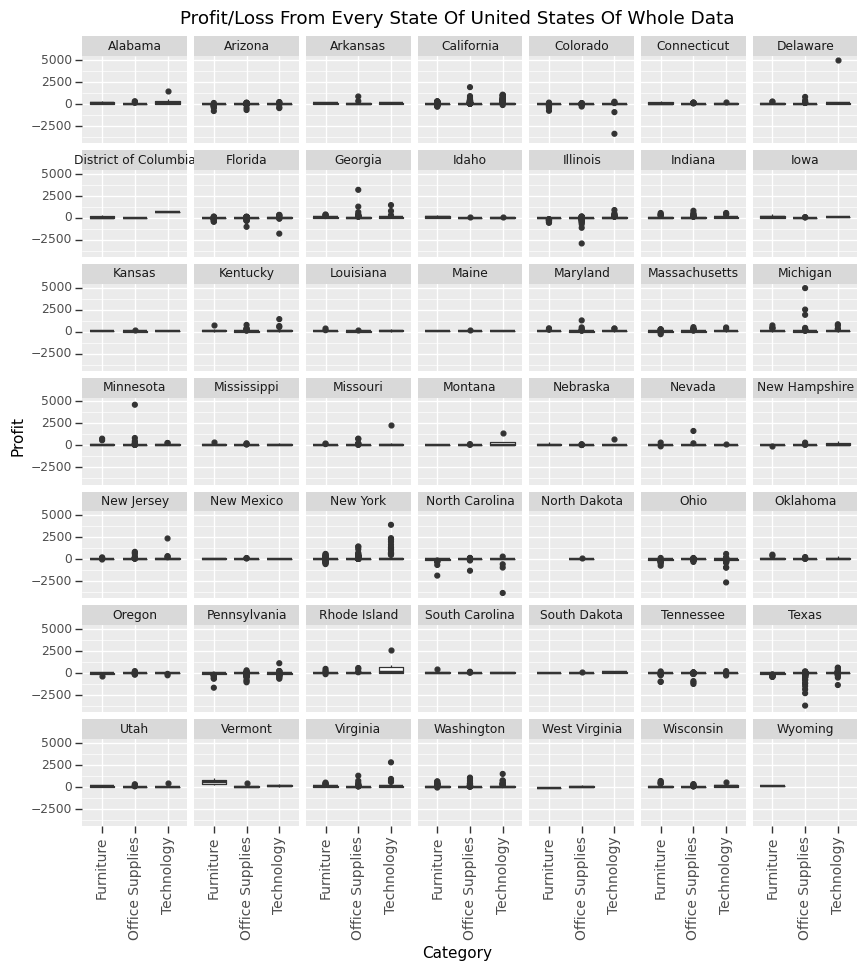

<ggplot: (8752603860961)>

In [24]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+coord_cartesian(ylim = (-4000,5000))+ggtitle("Profit/Loss From Every State Of United States Of Whole Data"))

from above graph we can see that in which states in which category company/organization has Profit and loss,highest loss is happend in "texas" states in "office suplies" category, there states who neither come in profit nor comes in loss range they are neutral ,states like "South Dakota","West Virginia","Wyoming","Maine",etc.

There are also some states who has no problem of loss,only profit has gained ,states like "Virginia","Washington","Newyork"(Newyork faced kinda loss in furniture Category but Thats ok if we compare it with profits.),same as "California",etc.

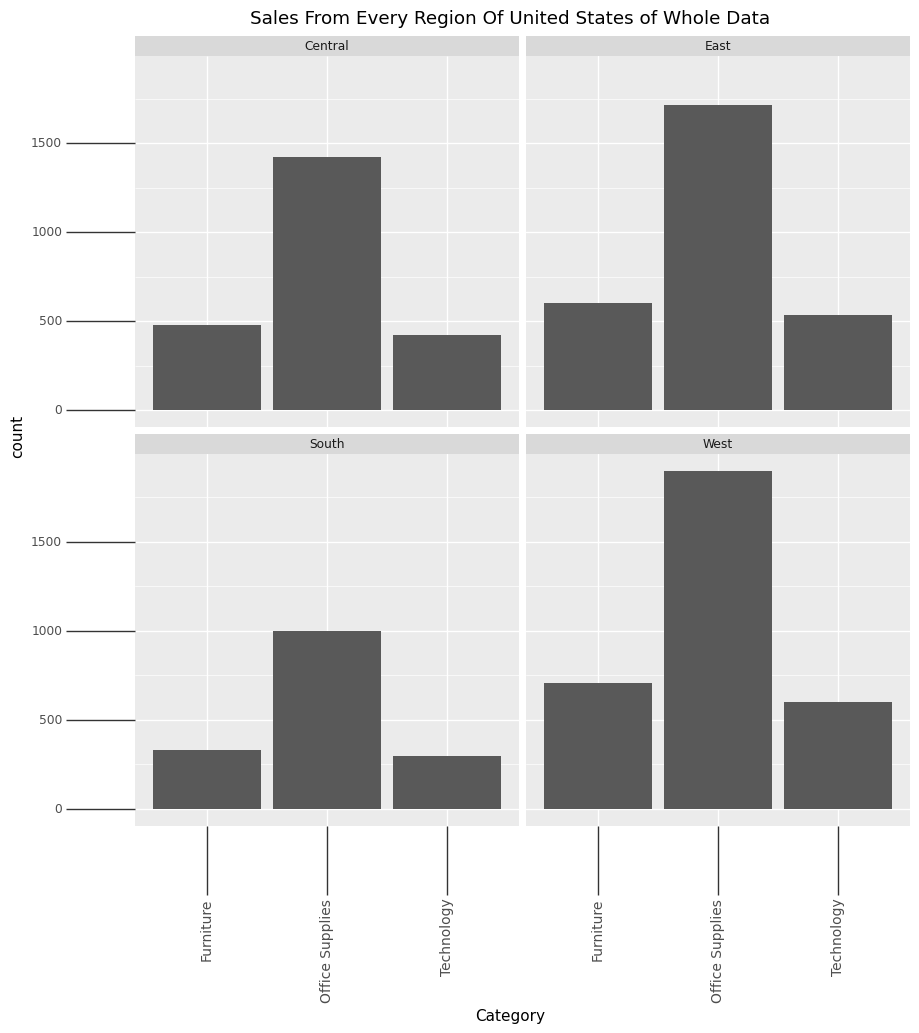

<ggplot: (8752603950789)>

In [25]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(data, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

The above Graph Shows the sales of categories in different Region of United States.From the Above Graph we can see that Sales of "Office supplies" are high in every Region compared to other Categories."Technology" and "Furniture" has very less sale in South Region compared to other regions of US.However,sales of "Technology" and "FUrniture" are less in other Regions too.

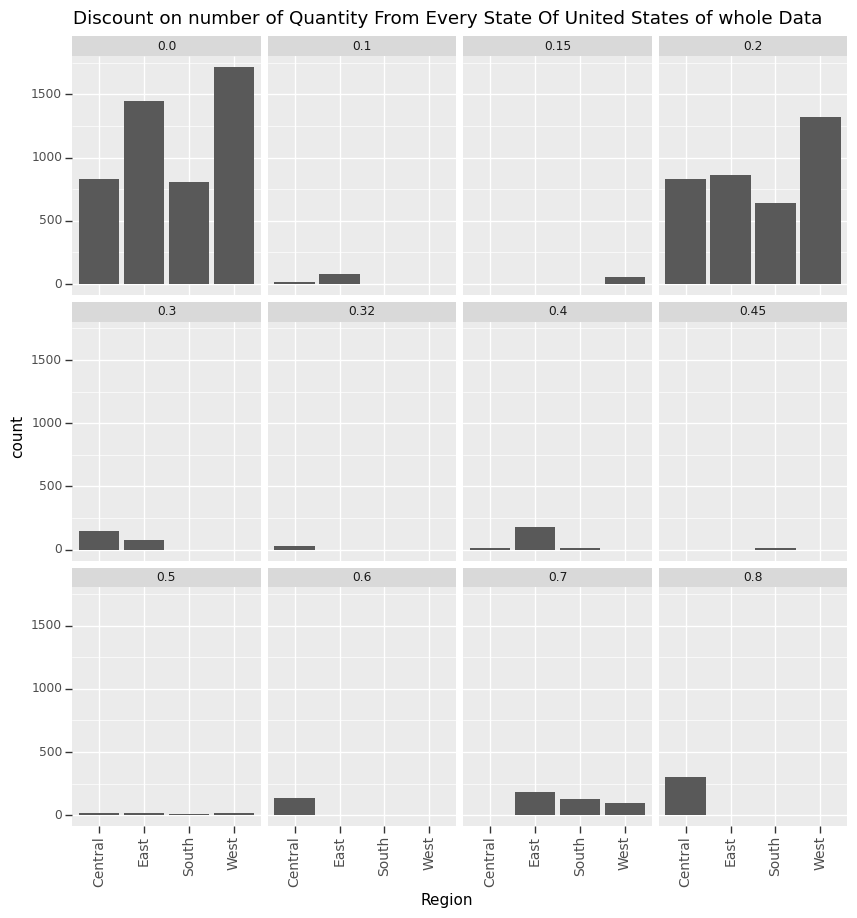

<ggplot: (-9223363284244088660)>

In [26]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount']) + flip_xlabels+ggtitle("Discount on number of Quantity From Every State Of United States of whole Data"))

From the Above Graph we can say that there were no discount on Higher number of quantity purchased on any region of US(may be their selling Price would be low). 0.2 Discount were given on Higher number of quantity purchased on any region of US.

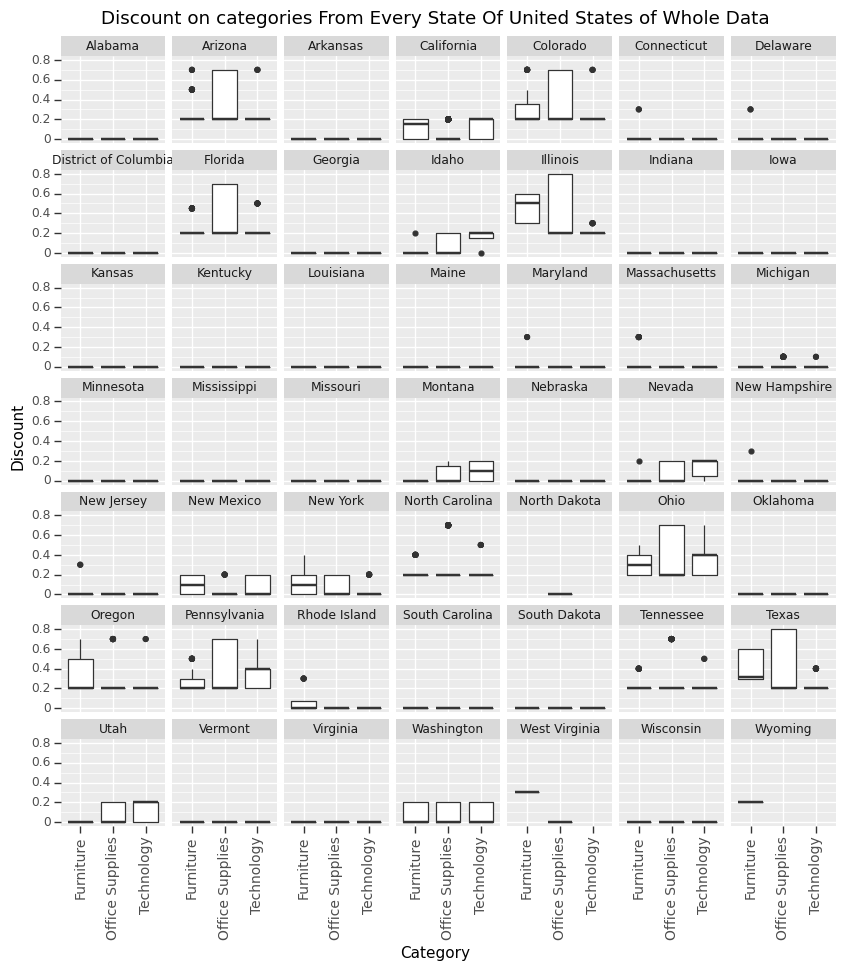

<ggplot: (8752604331412)>

In [27]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States of Whole Data"))

From the above Graph we can say that the most discount on categories is given some states i.e. "Texas","Oregon","Pennsylvania","Washinfton","Ohio","Newyork","Mexico","Utah" etc. there are also some states where no discounts were there on Categories like "Vermont","Virginia","Washington","West Virgenia" etc.

So Now we Grouped or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales.

In [28]:
grouped=pd.DataFrame(data.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


Variance of each states of Profit



In [29]:
data.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


From above Summary we can say that highest profit or loss sales has been done from which States,what is the varient profit is it high or low.What is the median Profit ,what is the Mean profit ,actually Mean will Give an Unbiased Result Compared to median Because Mean considered whole data in Calculation while Median is not.

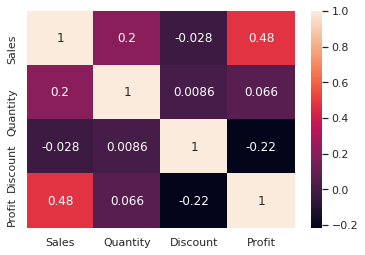

In [30]:
sns.heatmap(sample1.corr(), annot=True)

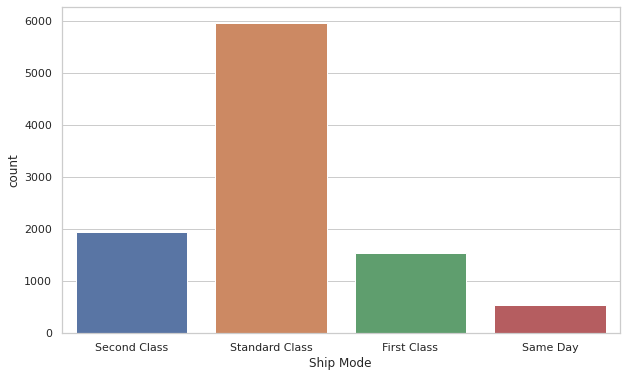

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x="Ship Mode",data=data)
plt.show()

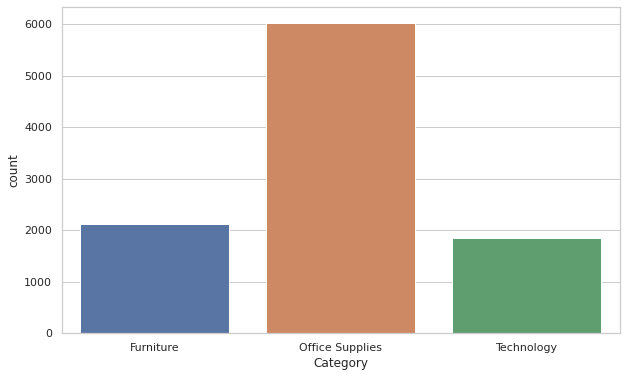

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="Category",data=data)
plt.show()

In [33]:
data['Sub-Category'].unique()
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

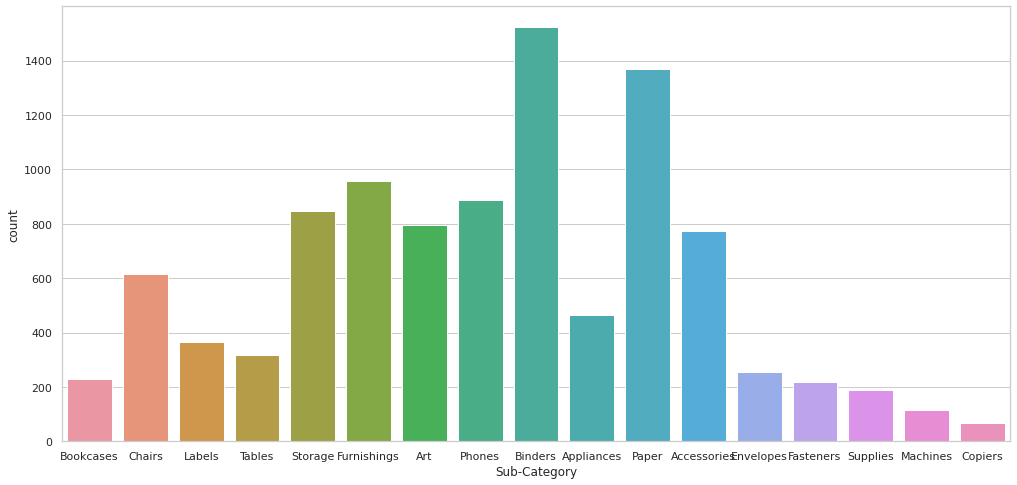

In [34]:
plt.figure(figsize=(17,8))
sns.countplot(x="Sub-Category",data=data)
plt.show()

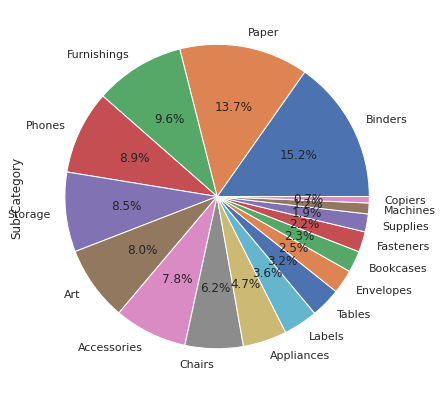

In [35]:
plt.figure(figsize=(10,7))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

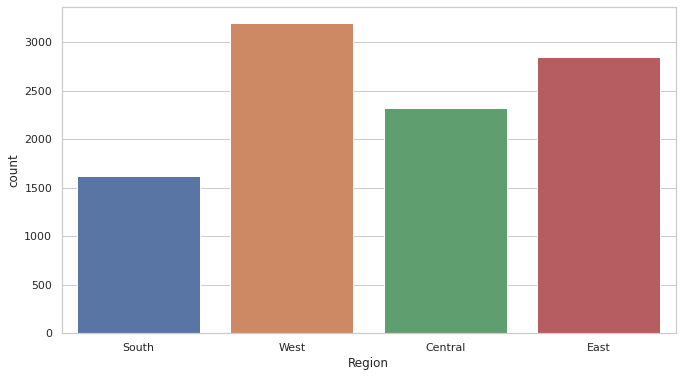

In [36]:
plt.figure(figsize=(11,6))
sns.countplot(x="Region",data=data)
plt.show()

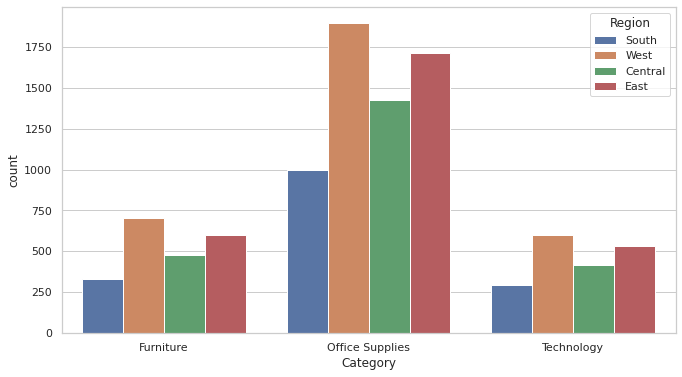

In [37]:
plt.figure(figsize=(11,6))
sns.countplot(x="Category", hue="Region", data=data)
plt.show()

In [38]:
data=data.groupby(['State']).Profit.mean().reset_index()
data

,State,Profit
0,Alabama,94.865989
1,Arizona,-15.303235
2,Arkansas,66.811452
3,California,38.171608
4,Colorado,-35.867351
5,Connecticut,42.823071
6,Delaware,103.930988
7,District of Columbia,105.958930
8,Florida,-8.875461
9,Georgia,88.315453


Conclusion

we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.


'Standard Class' accounts for the majority of Profit .

'Tables' ,'Bookcase' ,'Supplier' has noticeably less Profit .

'Furniture' has noticeably more Discount.

'West' and 'East' have noticeably more Profit .

'Florida' ,'Oregon','Arizona','Illinois', 'Texas','Pennsylvania','Tennessee','North Carlina','Colorado'and'Ohio' has noticeably less Profit.